In [32]:
import pandas as pd
import glob

In [33]:
data_files =glob.glob("/liubinxu/liubinxu/finance/learning/stat/amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_*_240_3_250_*_1_target_close1.stat.tsv")

In [34]:
len(data_files)

30

In [298]:
data_file = "/liubinxu/liubinxu/finance/learning/stat/amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_7_240_3_target_close1.stat.tsv"

In [303]:
data_files = glob.glob("/liubinxu/liubinxu/finance/learning/stat/amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_*_target_close1.stat.tsv")

In [269]:
data = pd.read_table(data_file, sep="\t", header=0)

In [270]:
data_file

'/liubinxu/liubinxu/finance/learning/stat/amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_7_240_3_target_close1.stat.tsv'

In [6]:
import os
from matplotlib import pyplot as plt

In [272]:
test_data_file = data_file.replace(".stat.tsv", "_test.stat.tsv")
test_data = pd.read_table(test_data_file, sep="\t", header=0)

In [273]:
test_data_file

'/liubinxu/liubinxu/finance/learning/stat/amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_7_240_3_target_close1_test.stat.tsv'

In [306]:
test_data_choose = test_data[["target_mean", "target_num", "clusters"]]
test_data_choose.rename(columns={"target_mean":"test_target_mean", "target_num":"test_target_num"}, inplace=True)
merge_data = data.merge(test_data_choose, left_on="clusters", right_on="clusters")

/tmp/ipykernel_2058544/556921291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_choose.rename(columns={"target_mean":"test_target_mean", "target_num":"test_target_num"}, inplace=True)


In [307]:
test_data_choose

,test_target_mean,test_target_num,clusters
0,0.005374,753,29
1,0.004707,135,148
2,0.004654,368,90
3,0.004571,483,31
4,0.004334,123,175
...,...,...,...
292,-0.005786,162,221
293,-0.006083,177,44
294,-0.007022,219,53
295,-0.007808,54,275


In [308]:
merge_data.fillna(0, inplace=True)
hold_period = 3 
merge_data["test_target_sum"]  = merge_data["test_target_mean"] * merge_data["test_target_num"] /hold_period
merge_data["test_target_sum_sum"] = merge_data["test_target_sum"].cumsum()


KeyError: 'test_target_mean'

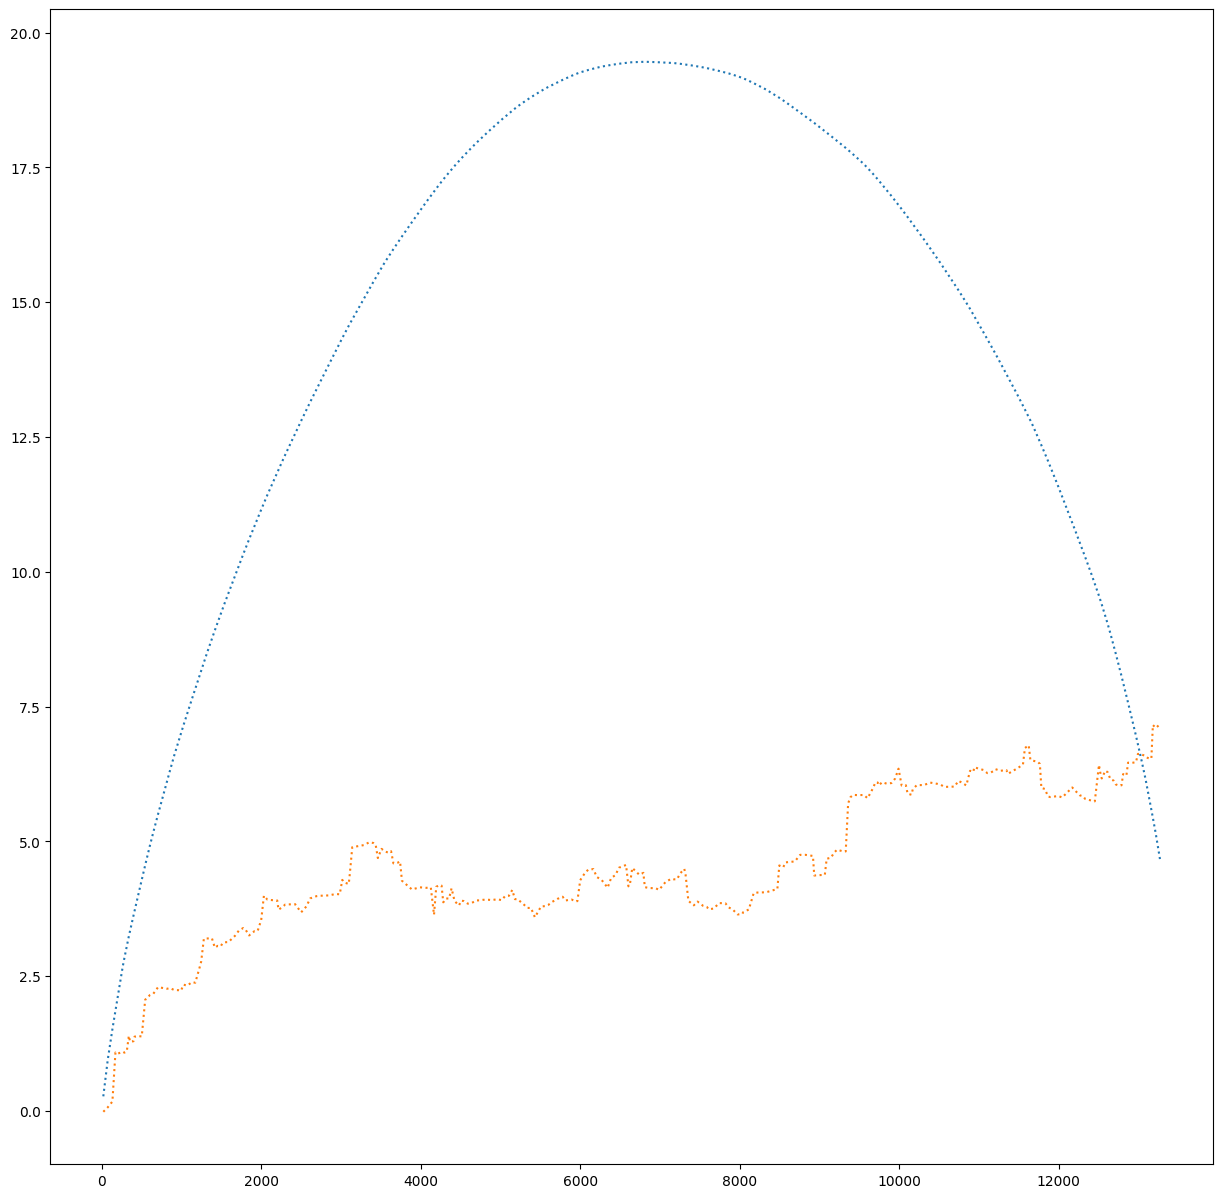

In [276]:
plt.rcParams["figure.figsize"] = (15,15)
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True)
ax1.plot(merge_data["num_sum"], merge_data["target_sum_sum"], linestyle=linestyle)
ax1.plot(merge_data["num_sum"], merge_data["test_target_sum_sum"], linestyle=linestyle)

In [288]:
merge_data.to_csv("amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_7_240_3_target_close1.stat.merge.tsv", sep="\t")

In [7]:
def get_fun(data):
    return (1+data["target_mean"]) ** (data["target_num"]/3)
def get_test_fun(data):
    return (1+data["test_target_mean"]) ** (data["test_target_num"]/3)

In [310]:
merge_data[:20]

,target_mean,target_num,target_sum,mannwhitneyu_p,clusters,num_sum,target_sum_sum,test_target_mean_x,test_target_num_x,test_target_sum,test_target_sum_sum,test_target_mean_y,test_target_num_y
0,0.006975,309,0.718387,0.135034,229,103.000000,0.718387,0.001417,234,0.110516,0.110516,0.001417,234
1,0.005490,276,0.505084,0.006321,141,195.000000,1.223471,-0.001121,138,-0.051582,0.058934,-0.001121,138
2,0.004611,378,0.581001,0.009263,76,321.000000,1.804471,0.000728,609,0.147805,0.206738,0.000728,609
3,0.004448,405,0.600446,0.022406,77,456.000000,2.404917,0.003068,219,0.223955,0.430694,0.003068,219
4,0.003790,147,0.185732,0.196551,159,505.000000,2.590649,-0.000648,813,-0.175631,0.255063,-0.000648,813
5,0.003638,342,0.414729,0.026921,40,619.000000,3.005378,-0.000065,249,-0.005383,0.249680,-0.000065,249
6,0.003511,366,0.428302,0.156268,20,741.000000,3.433681,0.000711,174,0.041223,0.290902,0.000711,174
7,0.003290,287,0.314778,0.081587,132,836.666667,3.748459,0.001998,123,0.081911,0.372814,0.001998,123
8,0.003237,309,0.333386,0.540409,70,939.666667,4.081844,-0.001318,159,-0.069855,0.302958,-0.001318,159
9,0.003108,312,0.323282,0.025290,118,1043.666667,4.405126,0.001231,204,0.083714,0.386673,0.001231,204


In [9]:
data_file

'/liubinxu/liubinxu/finance/learning/stat/amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_5_240_3_220_begin_end_1_target_close1_test.stat.tsv'

In [70]:
data_dict = {}
stat = list()

for data_file in data_files:
    name = os.path.basename(data_file).split(".")[0]
    data = pd.read_table(data_file, sep="\t", header=0)
    data_dict[name] = data
    
    
    test_data_file = data_file.replace(".stat.tsv", "_test.stat.tsv")
    test_data = pd.read_table(test_data_file, sep="\t", header=0)
    
    test_data_choose = test_data[["target_mean", "target_num", "clusters"]]
    test_data_choose.rename(columns={"target_mean":"test_target_mean", "target_num":"test_target_num"}, inplace=True)
    data = data.merge(test_data_choose, left_on="clusters", right_on="clusters")
#    data = data[data["target_num"]> 100]
    data = data[data["mannwhitneyu_p"] < 0.2]
    data.fillna(0, inplace=True)
    hold_period = 3 
    data["test_target_sum"]  = data["test_target_mean"] * data["test_target_num"] /hold_period
    data["test_target_sum_sum"] = data["test_target_sum"].cumsum()

    record = {
        "model": os.path.basename(data_file),

    }

    for choose_pct in [2, 5 ,10, 20, 30, 50, 70, 90, 100]:
        choose = data[data["num_sum"]< list(data["num_sum"])[-1]/100 * choose_pct]

        day = choose["target_num"].sum()/3
        choose["get_fun"] = choose.apply(get_fun, axis=1) 
        all_get = choose["get_fun"].prod()
        day_get = all_get ** (1/(day))

        test_day = choose["test_target_num"].sum()/3
        choose["test_get_fun"] = choose.apply(get_test_fun, axis=1) 
        test_all_get = choose["test_get_fun"].prod()
        test_day_get = test_all_get ** (1/(test_day))
        record.update({
            "day" + str(choose_pct):day,
            "all_get" + str(choose_pct):all_get,
            "day_get" + str(choose_pct):day_get,
            "test_day" + str(choose_pct):test_day,
            "test_all_get" + str(choose_pct):test_all_get,
            "test_day_get" + str(choose_pct):test_day_get 
        })
    
    
    stat.append(record)
    print(os.path.basename(data_file), day, all_get, day_get)

/tmp/ipykernel_3451821/2533692407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_choose.rename(columns={"target_mean":"test_target_mean", "target_num":"test_target_num"}, inplace=True)
/tmp/ipykernel_3451821/2533692407.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choose["get_fun"] = choose.apply(get_fun, axis=1)
/tmp/ipykernel_3451821/2533692407.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_8_240_3_250_all_1_target_close1.stat.tsv 3402.6666666666665 2.091223819596264 1.0002168385886374
amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_7_240_3_250_tree_1_target_close1.stat.tsv 3620.6666666666665 8.258981862184969 1.00058329506942
amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_9_240_3_250_tree_1_target_close1.stat.tsv 3828.0 1.6105955710554676 1.000124512461196
amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_6_240_3_250_no_1_target_close1.stat.tsv 4760.0 11.356831999247126 1.000510596591827
amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_7_240_3_250_begin_end_1_target_close1.stat.tsv 4323.666666666667 11.345401348155491 1.0005619061319924
amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_6_240_3_250_tail_1_target_close1.stat.tsv 3939.6666666666665 4.834099057765085 1.0004000363619296


/tmp/ipykernel_3451821/2533692407.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choose["get_fun"] = choose.apply(get_fun, axis=1)
/tmp/ipykernel_3451821/2533692407.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choose["test_get_fun"] = choose.apply(get_test_fun, axis=1)
/tmp/ipykernel_3451821/2533692407.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_5_240_3_250_half_1_target_close1.stat.tsv 3777.6666666666665 7.762122807704217 1.000542613195318
amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_6_240_3_250_tree_1_target_close1.stat.tsv 4022.0 91.28476774359 1.0011229532468011
amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_7_240_3_250_tail_1_target_close1.stat.tsv 3375.3333333333335 25.09329999987191 1.0009552063275797
amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_5_240_3_250_tree_1_target_close1.stat.tsv 3829.0 15.703291209069734 1.0007194726743296
amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_8_240_3_250_tail_1_target_close1.stat.tsv 4037.0 3.846734912006223 1.0003337749655965
amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_7_240_3_250_all_1_target_close1.stat.tsv 3048.0 3.6373883443322397 1.0004237334295492


/tmp/ipykernel_3451821/2533692407.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choose["get_fun"] = choose.apply(get_fun, axis=1)
/tmp/ipykernel_3451821/2533692407.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choose["test_get_fun"] = choose.apply(get_test_fun, axis=1)
/tmp/ipykernel_3451821/2533692407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_9_240_3_250_no_1_target_close1.stat.tsv 4986.666666666667 11.49216446517766 1.00048975868655
amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_9_240_3_250_all_1_target_close1.stat.tsv 3258.0 46.5605746697172 1.0011795638146568
amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_9_240_3_250_half_1_target_close1.stat.tsv 4145.666666666667 3.3231540663099555 1.0002897213899187
amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_5_240_3_250_no_1_target_close1.stat.tsv 5399.0 13.954938298352882 1.0004883269063412
amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_8_240_3_250_begin_end_1_target_close1.stat.tsv 3969.0 2.8554997848874137 1.0002643954612587
amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_8_240_3_250_tree_1_target_close1.stat.tsv 4535.333333333333 1.931621945289202 1.0001451729728876


/tmp/ipykernel_3451821/2533692407.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choose["test_get_fun"] = choose.apply(get_test_fun, axis=1)
/tmp/ipykernel_3451821/2533692407.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choose["get_fun"] = choose.apply(get_fun, axis=1)
/tmp/ipykernel_3451821/2533692407.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_6_240_3_250_all_1_target_close1.stat.tsv 4627.0 10.4185425994103 1.0005066308142347
amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_5_240_3_250_begin_end_1_target_close1.stat.tsv 3902.3333333333335 1.5293958187710164 1.0001088825227418
amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_5_240_3_250_tail_1_target_close1.stat.tsv 4723.666666666667 10.646989449607583 1.000500854446073
amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_6_240_3_250_begin_end_1_target_close1.stat.tsv 3879.0 13.373779844686203 1.0006687711075462
amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_5_240_3_250_all_1_target_close1.stat.tsv 4172.333333333333 5.543203294941404 1.000410543436383
amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_9_240_3_250_tail_1_target_close1.stat.tsv 4059.0 8.73773308366578 1.0005341782921686


/tmp/ipykernel_3451821/2533692407.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choose["get_fun"] = choose.apply(get_fun, axis=1)
/tmp/ipykernel_3451821/2533692407.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choose["test_get_fun"] = choose.apply(get_test_fun, axis=1)
/tmp/ipykernel_3451821/2533692407.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_9_240_3_250_begin_end_1_target_close1.stat.tsv 4074.6666666666665 3.654227191839245 1.0003180850921363
amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_8_240_3_250_half_1_target_close1.stat.tsv 4258.0 8.861298492975996 1.0005125064182288
amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_6_240_3_250_half_1_target_close1.stat.tsv 4073.6666666666665 2.044825544930767 1.000175609676085
amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_7_240_3_250_no_1_target_close1.stat.tsv 4952.666666666667 55.115695984819666 1.0008098784286066
amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_7_240_3_250_half_1_target_close1.stat.tsv 3986.6666666666665 14.15972322528517 1.0006650374796908
amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K72_8_240_3_250_no_1_target_close1.stat.tsv 5339.333333333333 6.685648653976897 1.0003559061033795


/tmp/ipykernel_3451821/2533692407.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choose["get_fun"] = choose.apply(get_fun, axis=1)
/tmp/ipykernel_3451821/2533692407.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choose["test_get_fun"] = choose.apply(get_test_fun, axis=1)
/tmp/ipykernel_3451821/2533692407.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [71]:
stat_df = pd.DataFrame(stat)
stat_df.to_csv("acclose1_test_statall02.tsv", sep="\t")

In [320]:
stat_df

,model,day2,all_get2,day_get2,test_day2,test_all_get2,test_day_get2,day5,all_get5,day_get5,...,day_get90,test_day90,test_all_get90,test_day_get90,day100,all_get100,day_get100,test_day100,test_all_get100,test_day_get100
0,amount_normalize20_rolling_96_exp_mean_close48...,210.000000,5.737263,1.008354,974.000000,9.041678,1.002263,610.333333,57.777307,1.006669,...,1.000813,12455.000000,6731.359162,1.000708,13280.333333,84.886197,1.000334,13437.000000,14913.362268,1.000715
1,amount_normalize20_rolling_96_exp_mean_close48...,257.000000,14.484776,1.010455,250.000000,1.868809,1.002504,625.000000,154.284963,1.008095,...,1.001024,10257.333333,4020.391347,1.000809,13398.000000,104.863121,1.000347,12729.333333,10777.865543,1.000730
2,amount_normalize20_rolling_96_exp_mean_close48...,219.000000,11.347687,1.011153,237.000000,1.726247,1.002306,632.000000,236.941476,1.008689,...,1.000965,11628.666667,204.259278,1.000458,13331.666667,271.825597,1.000421,13371.000000,1184.581134,1.000529
3,amount_normalize20_rolling_96_exp_mean_close48...,254.666667,3.937980,1.005397,116.000000,1.013191,1.000113,632.666667,12.250708,1.003968,...,1.000599,10369.333333,2007.282862,1.000734,13086.333333,95.660044,1.000349,13238.666667,5420.545743,1.000650
4,amount_normalize20_rolling_96_exp_mean_close48...,200.000000,7.696590,1.010256,743.000000,4.581580,1.002051,659.333333,57.279303,1.006158,...,1.000838,11951.000000,7448.993660,1.000746,13272.000000,339.476640,1.000439,13438.000000,10336.695295,1.000688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,amount_normalize20_rolling_96_exp_mean_close48...,97.000000,1.847544,1.006348,146.000000,1.768089,1.003911,563.000000,19.287495,1.005270,...,1.000709,11548.333333,1028.318710,1.000601,12852.333333,67.386642,1.000328,12735.333333,4189.614579,1.000655
146,amount_normalize20_rolling_96_exp_mean_close48...,256.000000,23.281266,1.012371,155.000000,1.140643,1.000849,609.000000,287.737690,1.009341,...,1.000983,9939.000000,266350.875295,1.001258,13399.666667,146.553531,1.000372,12713.333333,85699.721199,1.000894
147,amount_normalize20_rolling_96_exp_mean_close48...,253.000000,3.474842,1.004935,371.000000,2.277102,1.002221,637.000000,13.288233,1.004069,...,1.000820,12017.666667,7159.649652,1.000739,13226.666667,280.455983,1.000426,13486.333333,12913.917800,1.000702
148,amount_normalize20_rolling_96_exp_mean_close48...,159.000000,1.753026,1.003537,1750.666667,0.584366,0.999693,544.666667,6.044770,1.003309,...,1.000644,12717.666667,13259.558464,1.000747,13150.666667,121.568941,1.000365,13461.333333,22089.007806,1.000743


In [72]:
stat_df_test = pd.DataFrame()
stat_df_test["model"] = stat_df["model"]
stat_df_test["bacgroumd"] = stat_df["test_day_get" + str(100)]
for choose_pct in [2, 5 ,10, 20, 30, 50, 70, 90, 100]:
    stat_df_test["over_present" + str(choose_pct)] = stat_df["test_day_get" + str(choose_pct)] - stat_df["test_day_get" + str(100)]

In [73]:
stat_df_test.to_csv("acclose1_test_stattest02.tsv", sep="\t")

In [17]:
choose = data[data["num_sum"]< list(data["num_sum"])[-1]/10]
day = choose["target_num"].sum()/3
all_get = choose["get_fun"].prod()
day_get = all_get ** (1/day)

KeyError: 'get_fun'

In [39]:
stat_df_test["sum"] = stat_df_test["over_present5"] + stat_df_test["over_present10"] + (0.5* stat_df_test["over_present20"])

In [40]:
a = stat_df_test["over_present5"] + stat_df_test["over_present10"] + (0.5* stat_df_test["over_present20"])

In [41]:
stat_df_test["total"] = a

In [42]:
stat_df_test_sort = stat_df_test.sort_values("total", ascending=False)

In [43]:
stat_df_test_sort["model"]

12    amount_normalize20_rolling_96_exp_mean_close48...
27    amount_normalize20_rolling_96_exp_mean_close48...
3     amount_normalize20_rolling_96_exp_mean_close48...
29    amount_normalize20_rolling_96_exp_mean_close48...
15    amount_normalize20_rolling_96_exp_mean_close48...
25    amount_normalize20_rolling_96_exp_mean_close48...
7     amount_normalize20_rolling_96_exp_mean_close48...
28    amount_normalize20_rolling_96_exp_mean_close48...
1     amount_normalize20_rolling_96_exp_mean_close48...
8     amount_normalize20_rolling_96_exp_mean_close48...
5     amount_normalize20_rolling_96_exp_mean_close48...
19    amount_normalize20_rolling_96_exp_mean_close48...
20    amount_normalize20_rolling_96_exp_mean_close48...
2     amount_normalize20_rolling_96_exp_mean_close48...
23    amount_normalize20_rolling_96_exp_mean_close48...
6     amount_normalize20_rolling_96_exp_mean_close48...
11    amount_normalize20_rolling_96_exp_mean_close48...
14    amount_normalize20_rolling_96_exp_mean_clo

In [356]:
import numpy as np

/tmp/ipykernel_3451821/612142115.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_choose.rename(columns={"target_mean":"test_target_mean", "target_num":"test_target_num"}, inplace=True)


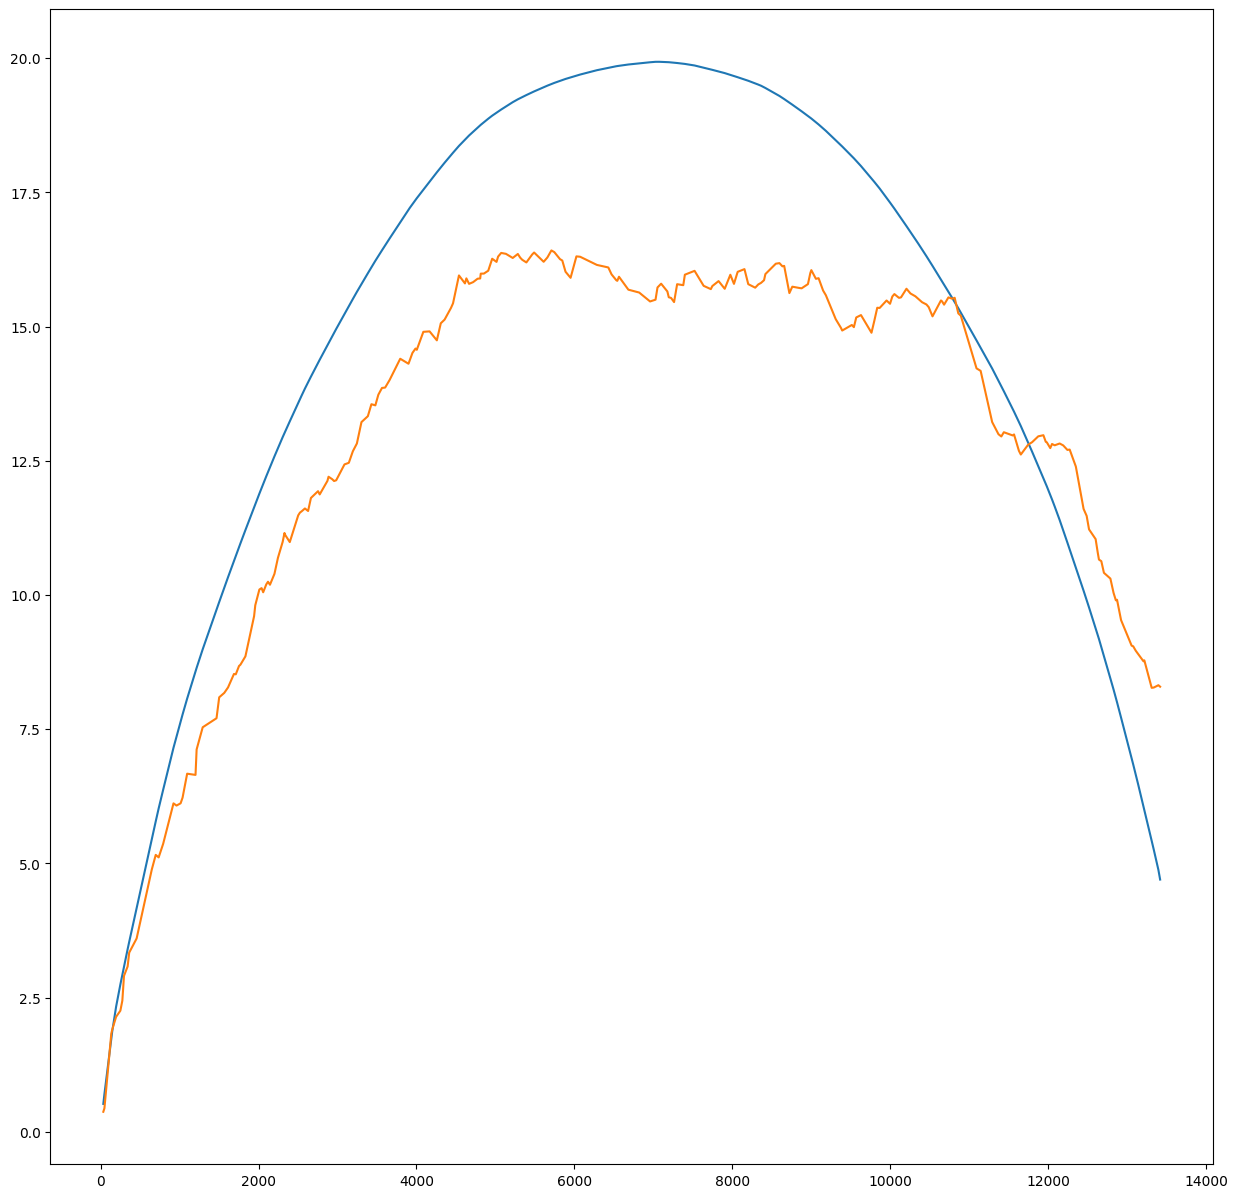

In [51]:
model = list(stat_df_test_sort["model"])[0]
data_file = "/liubinxu/liubinxu/finance/learning/stat/{}".format(model)
data = pd.read_table(data_file, sep="\t", header=0)
test_data_file = data_file.replace(".stat.tsv", "_test.stat.tsv")
test_data = pd.read_table(test_data_file, sep="\t", header=0)
    
test_data_choose = test_data[["target_mean", "target_num", "clusters"]]
test_data_choose.rename(columns={"target_mean":"test_target_mean", "target_num":"test_target_num"}, inplace=True)
data = data.merge(test_data_choose, left_on="clusters", right_on="clusters")
#     data = data[data["target_num"]>50]
data.fillna(0, inplace=True)
hold_period = 3 
data["test_target_sum"]  = data["test_target_mean"] * data["test_target_num"]/hold_period
data["test_target_sum_sum"] = data["test_target_sum"].cumsum()
merge_data = data
plt.rcParams["figure.figsize"] = (15,15)
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True)
ax1.plot(merge_data["num_sum"], merge_data["target_sum_sum"])
ax1.plot(merge_data["num_sum"], merge_data["test_target_sum_sum"])


In [53]:
merge_data_choose = merge_data[:40]

In [369]:
merge_data[]

SyntaxError: invalid syntax (134317493.py, line 1)

In [66]:
merge_data_choose[merge_data_choose["mannwhitneyu_p"] < 0.2 ]["test_target_mean"].mean()

0.005471575382916157

In [69]:
merge_data_choose[merge_data_choose["mannwhitneyu_p"] <0.2]

,target_mean,target_num,target_sum,mannwhitneyu_p,clusters,num_sum,target_sum_sum,test_target_mean,test_target_num,test_target_sum,test_target_sum_sum
0,0.015809,99,0.521686,0.000907,53,33.0,0.521686,0.013389,84,0.374897,0.374897
1,0.013028,42,0.182385,0.064633,97,47.0,0.704071,0.002074,93,0.064281,0.439179
2,0.011816,261,1.027994,0.000111,146,134.0,1.732065,0.015119,276,1.390926,1.830105
3,0.011725,36,0.140702,0.014155,239,146.0,1.872767,0.005066,45,0.075986,1.906091
4,0.009368,147,0.459015,0.004384,223,195.0,2.331782,0.005394,132,0.237357,2.143448
5,0.007683,162,0.414908,0.001766,195,249.0,2.746690,0.003182,108,0.114560,2.258007
6,0.007237,75,0.180934,0.006226,55,274.0,2.927624,0.007174,78,0.186536,2.444543
7,0.007113,63,0.149378,0.186446,204,295.0,3.077002,0.019254,72,0.462094,2.906637
8,0.007090,138,0.326141,0.003256,120,341.0,3.403143,0.004169,126,0.175099,3.081735
11,0.006678,576,1.282090,0.000935,147,647.0,5.452287,0.007828,492,1.283758,4.887185


In [144]:
def get_fun(data):
    return (1+data["target_mean"]) ** (data["target_num"]/3)
choose["get_fun"] = choose.apply(get_fun, axis=1) 

/tmp/ipykernel_2058544/3952264427.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  choose["get_fun"] = choose.apply(get_fun, axis=1)


In [152]:
day = choose["target_num"].sum()/3
all_get = choose["get_fun"].prod()
day_get = all_get ** (1/day)

# 480 mean 效果最差  24 mean好于96
# exp_mean 效果稍微好于exp


# 36 kdj 的 只24 mean的效果好了

close1 的 24 480 判断更为准确

In [151]:
all_get ** (1/day)

1.003119445914598

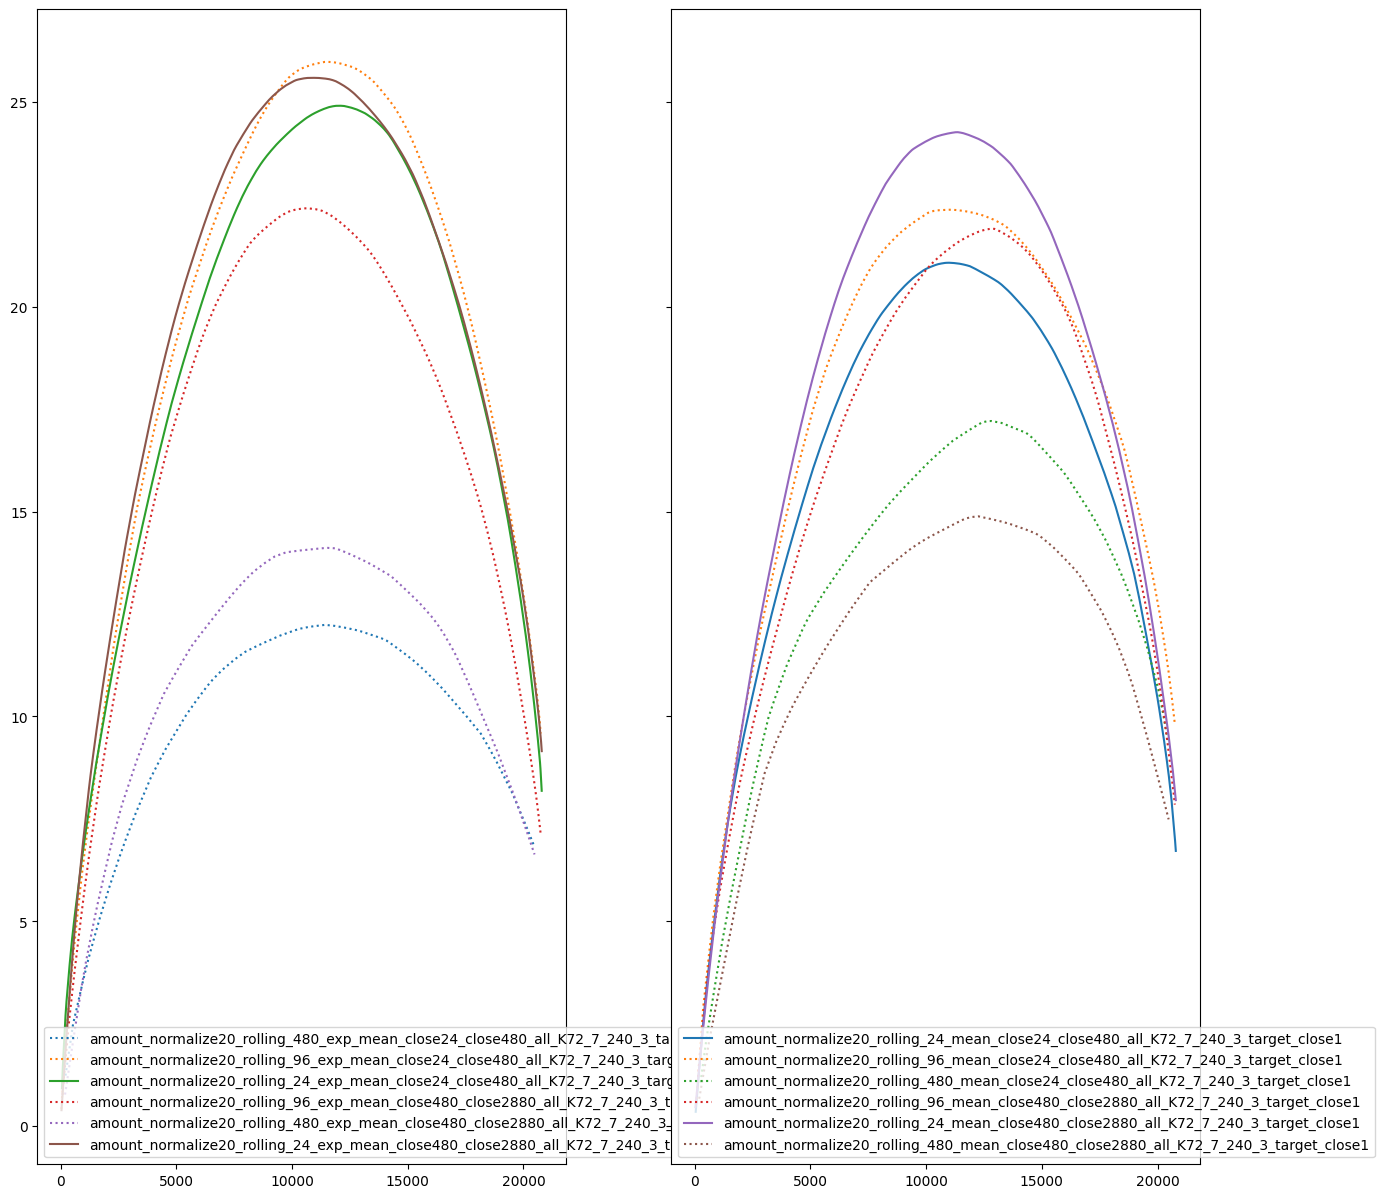

In [123]:
plt.rcParams["figure.figsize"] = (15,15)
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True)
# datac = data[:5000]
legs1 = []
legs2 = []
for n, df_stat in data_dict.items():
    if "rolling_24" in n:
        linestyle = "-"
    else:
        linestyle = ":"
    if "_all_" in n:
        if "_exp_mean_" in n:
            ax1.plot(df_stat["num_sum"], df_stat["target_sum_sum"], linestyle=linestyle)
            legs1.append(n)
        else:
            ax2.plot(df_stat["num_sum"], df_stat["target_sum_sum"], linestyle=linestyle)
            legs2.append(n)
    legs.append(n)
ax1.legend(legs1)
ax2.legend(legs2)

# 480 2880 分割的要快于 24 480  exp 反而没有作用了

# 36 kdj 的 只96 mean的效果好了

close1 的 24 480 没有明显差异

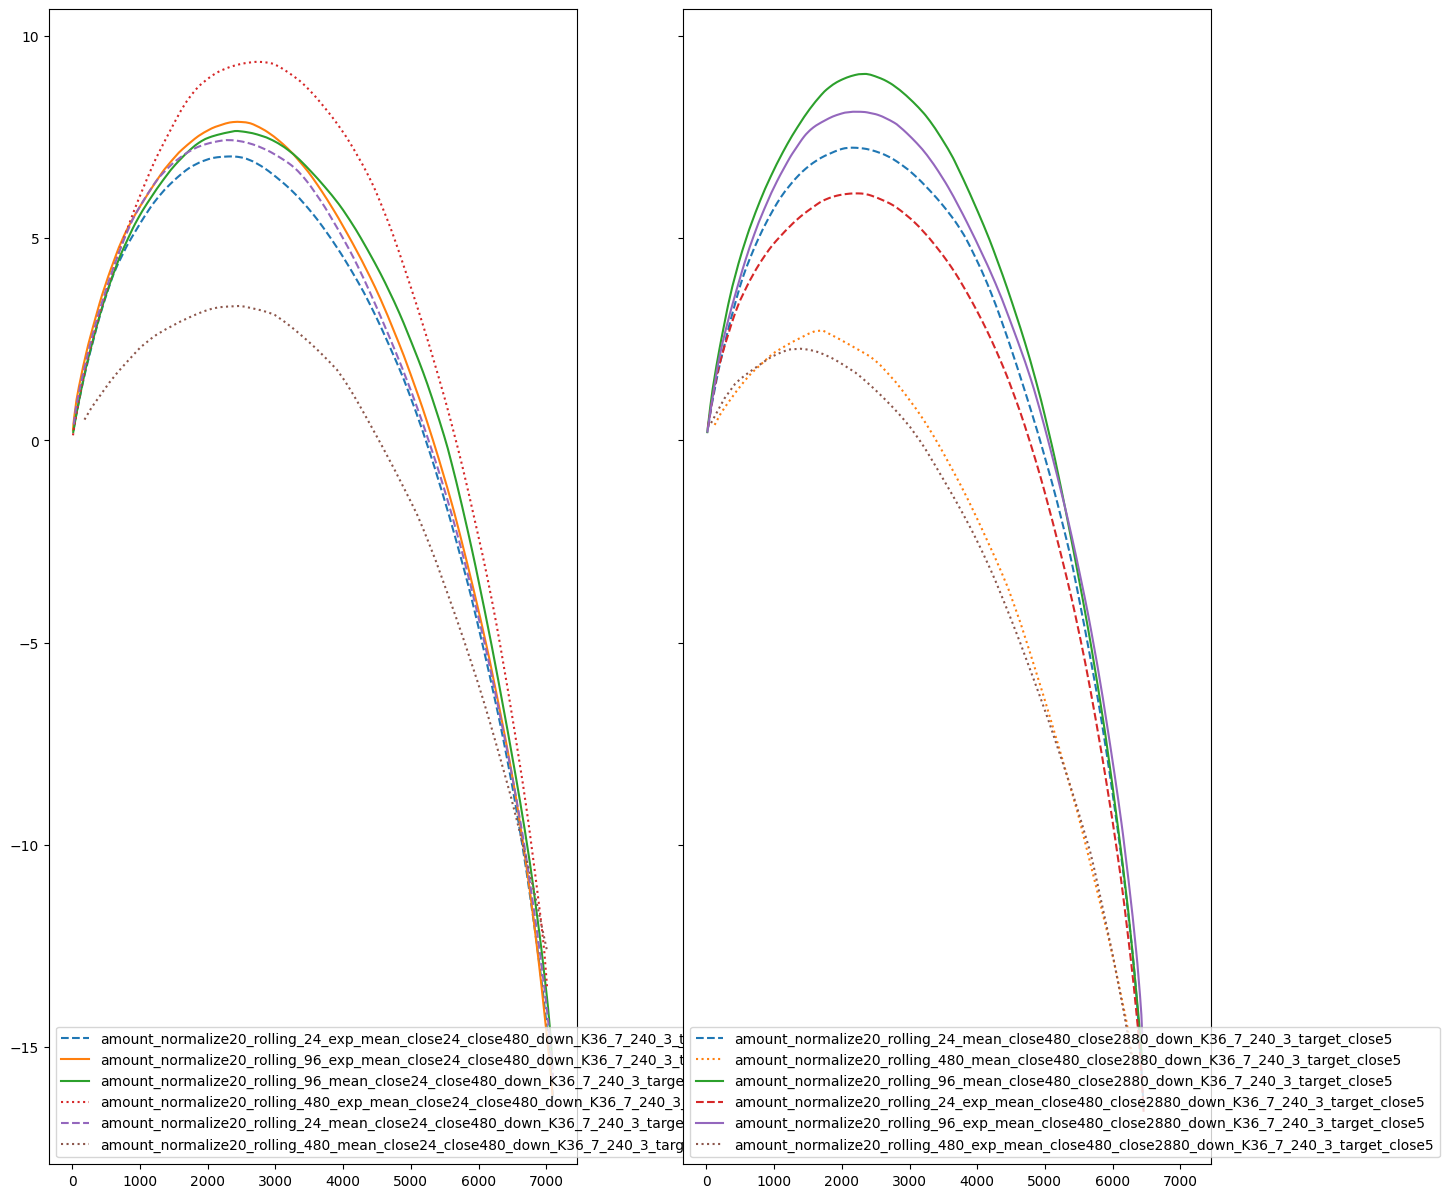

In [117]:
plt.rcParams["figure.figsize"] = (15,15)
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True)
# datac = data[:5000]
legs1 = []
legs2 = []
for n, df_stat in data_dict.items():
    if "rolling_24" in n:
        linestyle = "--"
    elif "rolling_96" in n:
        linestyle = "-"
    else:
        linestyle = ":"
    if "_down_" in n:
        if "close24_close480" in n:
            ax1.plot(df_stat["num_sum"], df_stat["target_sum_sum"], linestyle=linestyle)
            legs1.append(n)
        else:
            ax2.plot(df_stat["num_sum"], df_stat["target_sum_sum"], linestyle=linestyle)
            legs2.append(n)
    legs.append(n)
ax1.legend(legs1)
ax2.legend(legs2)

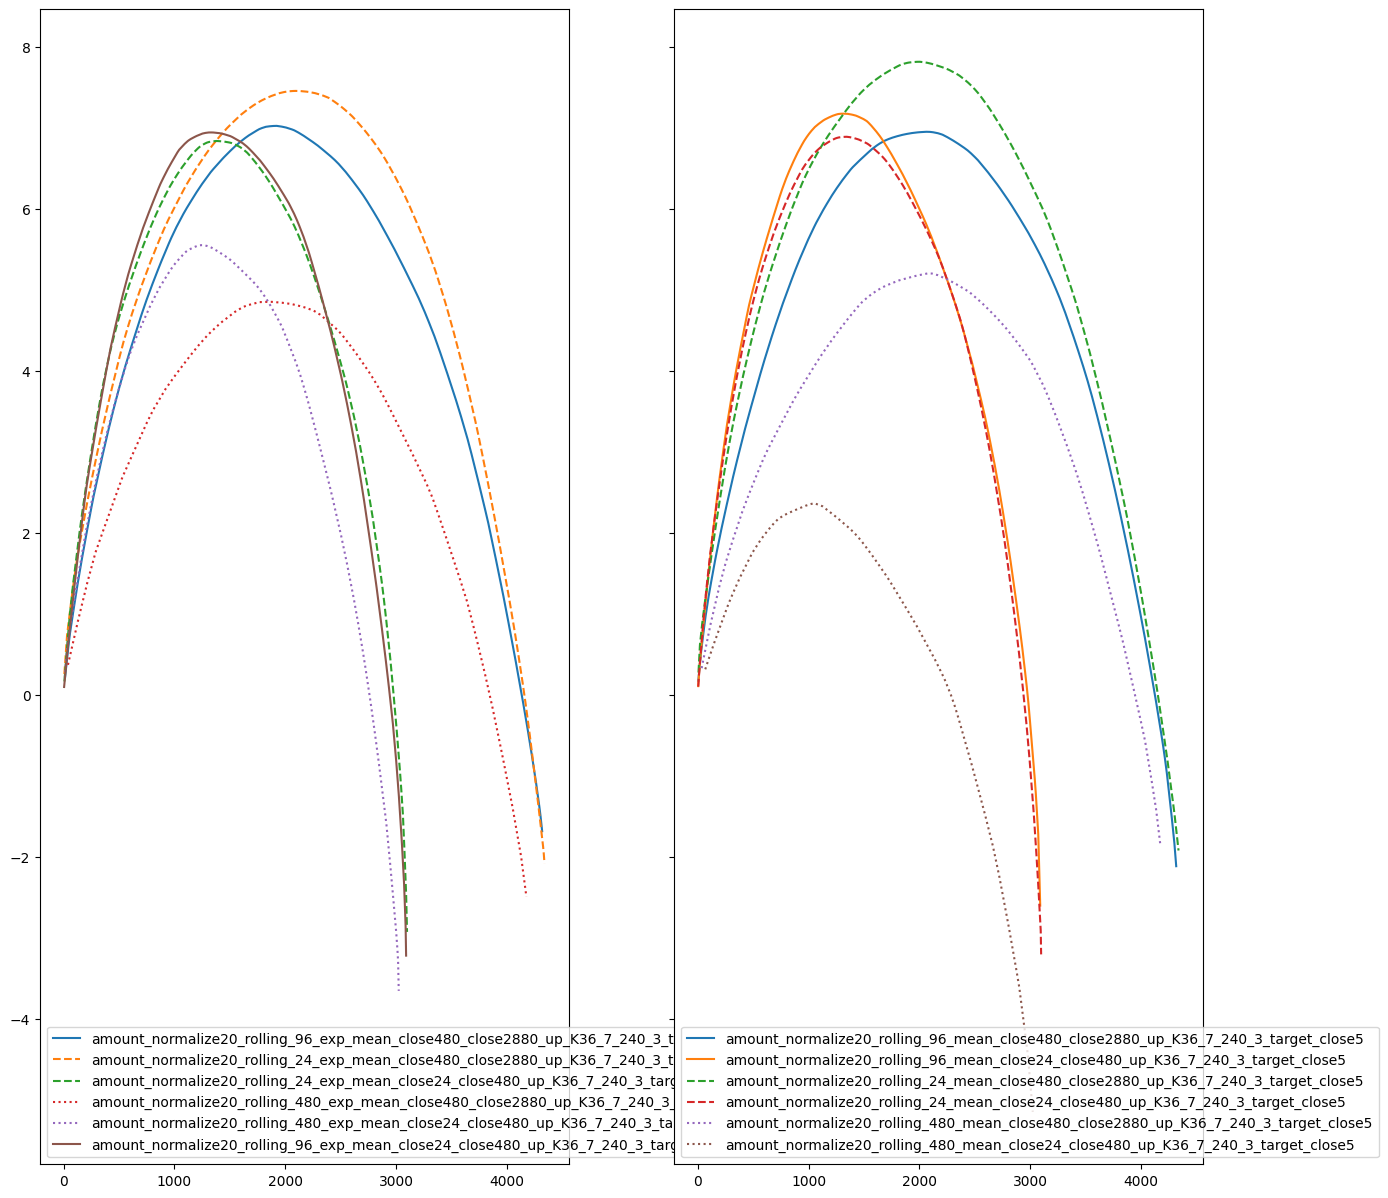

In [118]:
plt.rcParams["figure.figsize"] = (15,15)
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True)
# datac = data[:5000]
legs1 = []
legs2 = []

for n, df_stat in data_dict.items():
    if "rolling_24" in n:
        linestyle = "--"
    elif "rolling_96" in n:
        linestyle = "-"
    else:
        linestyle = ":"
    if "_up_" in n:
        if "_exp_mean_" in n:
            ax1.plot(df_stat["num_sum"], df_stat["target_sum_sum"], linestyle=linestyle)
            legs1.append(n)
        else:
            ax2.plot(df_stat["num_sum"], df_stat["target_sum_sum"], linestyle=linestyle)
            legs2.append(n)
    legs.append(n)
ax1.legend(legs1)
ax2.legend(legs2)

In [ ]:
480 mean_exp 没有作用

# 数据量越小越需要更加短期的成交量区分
K18 选出来的 使用24mean 明显好于96

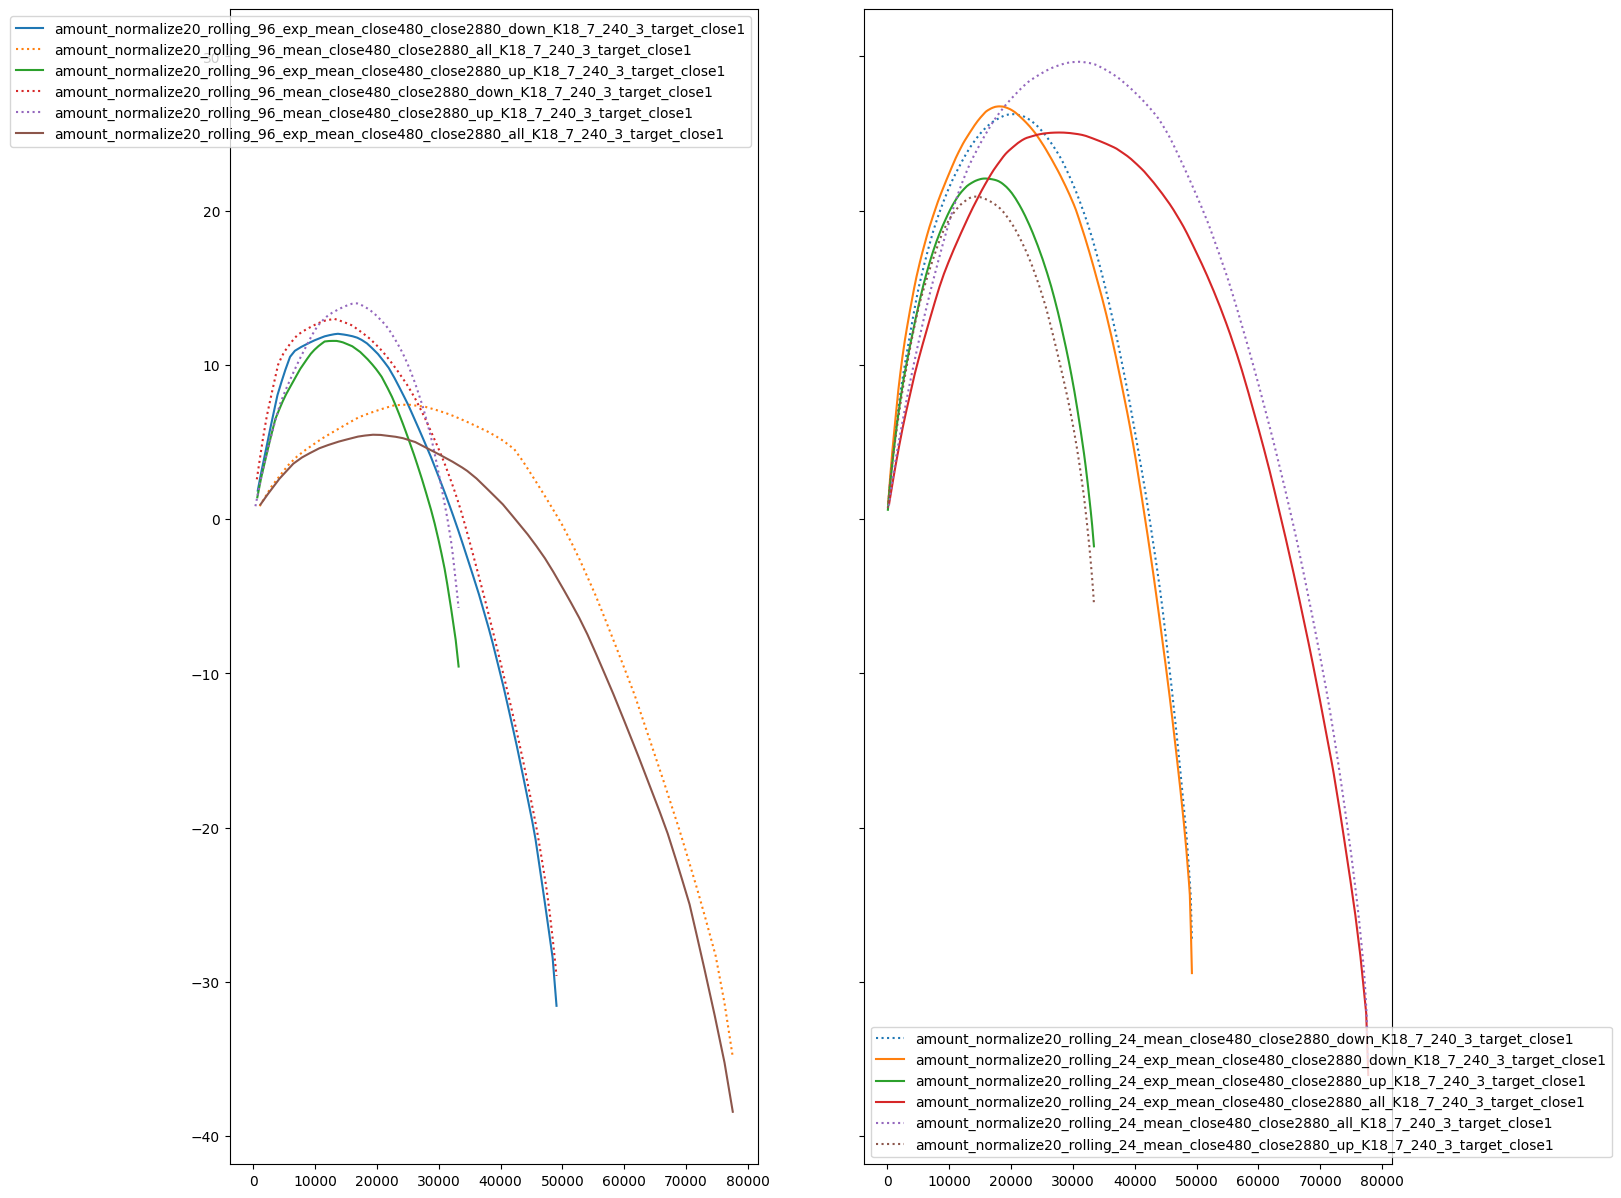

In [130]:
plt.rcParams["figure.figsize"] = (15,15)
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True)
# datac = data[:5000]
legs1 = []
legs2 = []
for n, df_stat in data_dict.items():
    if "_exp_mean_" in n:
        linestyle = "-"
    else:
        linestyle = ":"
    if "_close480_close2880_" in n:
        if "_rolling_96_" in n:
            ax1.plot(df_stat["num_sum"], df_stat["target_sum_sum"], linestyle=linestyle)
            legs1.append(n)
        elif "_rolling_24_" in n:
            ax2.plot(df_stat["num_sum"], df_stat["target_sum_sum"], linestyle=linestyle)
            legs2.append(n)
    legs.append(n)
ax1.legend(legs1)
ax2.legend(legs2)

In [78]:
legs1

['amount_normalize20_rolling_96_mean_close480_close2880_down_K36_7_240_3_target_close1',
 'amount_normalize20_rolling_96_mean_close480_close2880_all_K36_7_240_3_target_close1',
 'amount_normalize20_rolling_96_mean_close480_close2880_up_K36_7_240_3_target_close1',
 'amount_normalize20_rolling_96_exp_mean_close480_close2880_down_K36_7_240_3_target_close1',
 'amount_normalize20_rolling_96_exp_mean_close480_close2880_up_K36_7_240_3_target_close1',
 'amount_normalize20_rolling_96_exp_mean_close480_close2880_all_K36_7_240_3_target_close1']

In [31]:
legs2

['amount_normalize20_rolling_24_exp_mean_close480_close2880_down_K72_7_240_3_target_close1',
 'amount_normalize20_rolling_24_mean_close480_close2880_all_K72_7_240_3_target_close1',
 'amount_normalize20_rolling_24_exp_mean_close480_close2880_up_K72_7_240_3_target_close1',
 'amount_normalize20_rolling_24_mean_close480_close2880_down_K72_7_240_3_target_close1',
 'amount_normalize20_rolling_24_mean_close480_close2880_up_K72_7_240_3_target_close1',
 'amount_normalize20_rolling_24_exp_mean_close480_close2880_all_K72_7_240_3_target_close1']

In [38]:
legs2

['amount_normalize20_rolling_24_exp_mean_close480_close2880_down_K72_7_240_3_target_close1',
 'amount_normalize20_rolling_24_mean_close480_close2880_all_K72_7_240_3_target_close1',
 'amount_normalize20_rolling_24_exp_mean_close480_close2880_up_K72_7_240_3_target_close1',
 'amount_normalize20_rolling_24_mean_close480_close2880_down_K72_7_240_3_target_close1',
 'amount_normalize20_rolling_24_mean_close480_close2880_up_K72_7_240_3_target_close1',
 'amount_normalize20_rolling_24_exp_mean_close480_close2880_all_K72_7_240_3_target_close1']